In [215]:
import string
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [216]:
dataset = pd.read_csv("emotion.csv").query("Emotion == 'happy' or Emotion == 'sadness'")[:2000]
le = LabelEncoder()
dataset["Emotion"] = le.fit_transform(dataset["Emotion"])

In [217]:
def process_text(text):
  result = [char for char in text if char not in string.punctuation]
  result = "".join(result)
  result = [word.lower() for word in result.split() if word.lower() not in stopwords.words("english")]
  result = " ".join(result)
  return result

dataset["Text"] = dataset['Text'].apply(process_text)

In [218]:
dataset

,Text,Emotion
0,didnt feel humiliated,1
1,go feeling hopeless damned hopeful around some...,1
5,ive feeling little burdened lately wasnt sure,1
8,petronas years feel petronas performed well ma...,0
10,feel like make suffering seeing mean something,1
...,...,...
3193,ive feeling far perfect area motherhood,0
3195,try let anxiety show make feel unwelcome,1
3197,feel peaceful secure independent,0
3199,feeling lil groggy cough medicine,1


In [219]:
# wordcloud = WordCloud().generate(" ".join(dataset["Text"]))
# plt.imshow(wordcloud)
# plt.axis("off")
# plt.show()

In [220]:
print(" ".join(dataset.query("Emotion == 0")["Text"]))

petronas years feel petronas performed well made huge profit feel running divine experience expect type spiritual encounter immense sympathy general point possible proto writer trying find time write corners life sign agent let alone publishing contract feels little precious feel reassured anxiety side feeling amused delighted able help chai lifeline support encouragement great feeling glad able help feel superior dead chicken grieving child get giddy feeling elegant perfectly fitted pencil skirt imagine real life scenario would emotionally connected enough someone feel totally accepted safe morally acceptable close prolonged physical contact sex expected subsequently sure would make feel content anything feeling need creative however want know something someone causing feel less splendid self step away need need someone need protected feel safe small find season words plan share everyday life stories traveling adventures inspirations handmade creations hope also feel inspired already 

In [221]:
print(" ".join(dataset.query("Emotion == 1")["Text"]))

didnt feel humiliated go feeling hopeless damned hopeful around someone cares awake ive feeling little burdened lately wasnt sure feel like make suffering seeing mean something feel low energy thirsty didnt really feel embarrassed feel pretty pathetic time started feeling sentimental dolls child began collection vintage barbie dolls sixties still love wish best longer tolerate effect bm lives fact turned bitter angry person always particularly kind people around feeling stressed feel inhibited someone elses kitchen like im painting someone elses picture become overwhelmed feel defeated feeling discouraged already robbing peter pay paul get cow year cant afford get cow way feeling listless need new things something different found feeling little discouraged morning feel know basically like fake realm science fiction hate living dads roof gives excuse asshole hes providing live think feels needs make feel unwelcome possible ill leave roller coaster emotions supposed feelings something un

In [222]:
X = dataset["Text"]
Y = dataset["Emotion"]

In [223]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [224]:
cv = CountVectorizer(max_df=500, min_df=10) #0.6633
# cv = CountVectorizer(max_df=500, min_df=10, ngram_range=(1, 2)) #0.6166
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [225]:
mnb = MultinomialNB() #0.6633
mnb.fit(X_train_cv, Y_train)
Y_pred = mnb.predict(X_test_cv)
print(accuracy_score(Y_test, Y_pred))

0.6633333333333333


In [226]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.67      0.78      0.72       334
           1       0.65      0.52      0.58       266

    accuracy                           0.66       600
   macro avg       0.66      0.65      0.65       600
weighted avg       0.66      0.66      0.66       600



<AxesSubplot:>

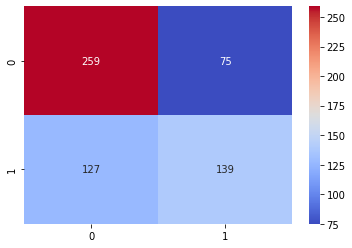

In [227]:
sns.heatmap(confusion_matrix(Y_test, Y_pred), cmap="coolwarm", annot=True, fmt="d")

In [228]:
lrc = LogisticRegression(random_state=42) #0.6683
lrc.fit(X_train_cv, Y_train)
Y_pred = lrc.predict(X_test_cv)
print(accuracy_score(Y_test, Y_pred))

0.6683333333333333


In [229]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.67      0.79      0.73       334
           1       0.66      0.52      0.58       266

    accuracy                           0.67       600
   macro avg       0.67      0.65      0.65       600
weighted avg       0.67      0.67      0.66       600



<AxesSubplot:>

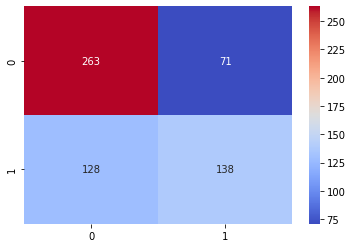

In [230]:
sns.heatmap(confusion_matrix(Y_test, Y_pred), cmap="coolwarm", annot=True, fmt="d")

In [231]:
tv = TfidfVectorizer(max_df=500, min_df=10)
X_train_tv = tv.fit_transform(X_train)
X_test_tv = tv.transform(X_test)

In [232]:
mnb = MultinomialNB() #0.6633
mnb.fit(X_train_tv, Y_train)
Y_pred = mnb.predict(X_test_tv)
print(accuracy_score(Y_test, Y_pred))

0.6633333333333333


In [233]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.66      0.83      0.73       334
           1       0.68      0.45      0.55       266

    accuracy                           0.66       600
   macro avg       0.67      0.64      0.64       600
weighted avg       0.67      0.66      0.65       600



<AxesSubplot:>

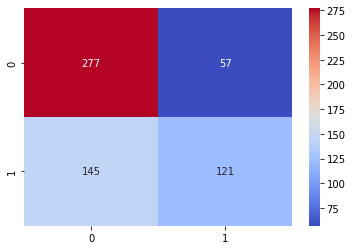

In [234]:
sns.heatmap(confusion_matrix(Y_test, Y_pred), cmap="coolwarm", annot=True, fmt="d")

In [235]:
lrc = LogisticRegression(random_state=42) #0.6866
lrc.fit(X_train_tv, Y_train)
Y_pred = lrc.predict(X_test_tv)
print(accuracy_score(Y_test, Y_pred))

0.6866666666666666


In [236]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.68      0.82      0.74       334
           1       0.69      0.52      0.60       266

    accuracy                           0.69       600
   macro avg       0.69      0.67      0.67       600
weighted avg       0.69      0.69      0.68       600



<AxesSubplot:>

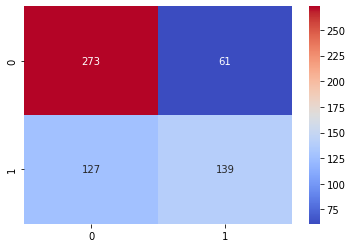

In [237]:
sns.heatmap(confusion_matrix(Y_test, Y_pred), cmap="coolwarm", annot=True, fmt="d")